In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
import pandas as pd
import numpy as np

# Import LogistRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

# Import Seaborn and Matplotlib for visualizations
import seaborn as sns
import matplotlib.pyplot as plt

# To save logistical regression and random forest models
import joblib

# Import Dense and LeakyReLu layers for neural network model
from tensorflow.keras.layers import Dense, LeakyReLU

In [2]:
#Check where this is file is stored
import os
os.getcwd()

'/Users/morganpfunder/Desktop/Data Analytics/Homework/Project_4_Grp_1/Final docs'

In [3]:
# Import in csv file
df = pd.read_csv("../Resources/final_data.csv")
df.head()

,row_id,movie_name,rating,votes,meta_score,genre0,genre1,genre2,genre3,pr_rating,...,cast0,cast1,cast2,cast3,cast4,director,number_rating,netflix_top_10,weekly_hours_viewed,weekly_views
0,0,Leave the World Behind,6.5,90000.0,67,"Drama, Mystery, Thriller",Drama,Mystery,Thriller,R,...,"Julia Roberts, Mahershala Ali, Ethan Hawke, My...",Julia Roberts,Mahershala Ali,Ethan Hawke,Myha'la,Sam Esmail,4,1,98700000.0,41700000.0
1,16,Family Switch,5.6,16000.0,37,"Comedy, Family",Comedy,Family,NaN,PG,...,"Jennifer Garner, Ed Helms, Emma Myers, Brady Noon",Jennifer Garner,Ed Helms,Emma Myers,Brady Noon,McG,2,1,39200000.0,22200000.0
2,19,How the Grinch Stole Christmas,6.3,280000.0,46,"Comedy, Family, Fantasy",Comedy,Family,Fantasy,PG,...,"Jim Carrey, Taylor Momsen, Kelley, Jeffrey Tambor",Jim Carrey,Taylor Momsen,Kelley,Jeffrey Tambor,Ron Howard,2,1,7530000.0,NaN
3,23,Leo,7.0,21000.0,65,"Animation, Comedy, Family",Animation,Comedy,Family,PG,...,"Adam Sandler, Bill Burr, Cecily Strong, Jason ...",Adam Sandler,Bill Burr,Cecily Strong,Jason Alexander,Robert MarianettiRobert SmigelDavid Wachtenheim,2,1,61700000.0,34600000.0
4,27,Chicken Run: Dawn of the Nugget,6.5,6300.0,63,"Animation, Adventure, Comedy",Animation,Adventure,Comedy,PG,...,"Thandiwe Newton, Zachary Levi, Bella Ramsey, I...",Thandiwe Newton,Zachary Levi,Bella Ramsey,Imelda Staunton,Sam Fell,2,1,20300000.0,11900000.0


In [4]:
# Overview data types, non-nulls values, columns and row
# weekly_hours_viewed and weekly_views are missing a lot of data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1734 entries, 0 to 1733
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   row_id               1734 non-null   int64  
 1   movie_name           1734 non-null   object 
 2   rating               1728 non-null   float64
 3   votes                1728 non-null   float64
 4   meta_score           1734 non-null   int64  
 5   genre0               1734 non-null   object 
 6   genre1               1734 non-null   object 
 7   genre2               1608 non-null   object 
 8   genre3               1219 non-null   object 
 9   pr_rating            1734 non-null   object 
 10  year                 1734 non-null   int64  
 11  duration             1734 non-null   float64
 12  cast0                1734 non-null   object 
 13  cast1                1734 non-null   object 
 14  cast2                1733 non-null   object 
 15  cast3                1733 non-null   o

In [5]:
# Determine the number of unique values in each column.
df.nunique()

row_id                 1734
movie_name             1704
rating                   58
votes                   673
meta_score               85
genre0                  236
genre1                   15
genre2                   19
genre3                   18
pr_rating                 6
year                     72
duration                119
cast0                  1724
cast1                   762
cast2                  1095
cast3                  1274
cast4                  1414
director                886
number_rating             6
netflix_top_10            2
weekly_hours_viewed     164
weekly_views             38
dtype: int64

In [6]:
# Check the statistical summary of the numerical data
df.describe()

,row_id,rating,votes,meta_score,year,duration,number_rating,netflix_top_10,weekly_hours_viewed,weekly_views
count,1734.000000,1728.000000,1.728000e+03,1734.000000,1734.000000,1734.000000,1734.000000,1734.000000,1.750000e+02,4.800000e+01
mean,974.822376,6.952604,2.975975e+05,62.046713,2007.115917,1.952813,3.281430,0.100923,1.601434e+07,9.135417e+06
std,559.166408,0.854542,3.202216e+05,16.431277,14.080014,0.356897,0.817672,0.301313,2.112887e+07,9.090666e+06
min,0.000000,2.400000,1.070000e+02,14.000000,1939.000000,1.150000,1.000000,0.000000,2.740000e+06,2.400000e+06
25%,492.250000,6.400000,9.400000e+04,50.250000,1999.000000,1.700000,3.000000,0.000000,6.545000e+06,3.575000e+06
50%,975.500000,7.000000,2.030000e+05,63.000000,2010.000000,1.900000,3.000000,0.000000,9.030000e+06,5.550000e+06
75%,1452.750000,7.600000,3.830000e+05,74.000000,2019.000000,2.150000,4.000000,0.000000,1.349000e+07,1.200000e+07
max,1949.000000,9.300000,2.800000e+06,100.000000,2023.000000,4.100000,6.000000,1.000000,1.487200e+08,4.170000e+07


In [7]:
# Check for missing values
df.isna().sum()

row_id                    0
movie_name                0
rating                    6
votes                     6
meta_score                0
genre0                    0
genre1                    0
genre2                  126
genre3                  515
pr_rating                 0
year                      0
duration                  0
cast0                     0
cast1                     0
cast2                     1
cast3                     1
cast4                     1
director                  0
number_rating             0
netflix_top_10            0
weekly_hours_viewed    1559
weekly_views           1686
dtype: int64

In [8]:
# Drop rows missing both rating and votes
df = df.dropna(subset=['rating', 'votes']).copy()

# Fill missing cast name with 'Unknown'
df[['cast2', 'cast3', 'cast4']] = df[['cast2', 'cast3', 'cast4']].fillna('Unknown')

# Fill weekly_hours_viewed with 0 if not in Top 10
df['weekly_hours_viewed'] = df['weekly_hours_viewed'].fillna(0)

In [9]:
# Change the string of genres into a list
df['all_genres'] = df['genre0'].str.split(', ')
df['all_genres']

0           [Drama, Mystery, Thriller]
1                     [Comedy, Family]
2            [Comedy, Family, Fantasy]
3          [Animation, Comedy, Family]
4       [Animation, Adventure, Comedy]
                     ...              
1729       [Action, Adventure, Sci-Fi]
1730         [Drama, Musical, Romance]
1731          [Comedy, Drama, Romance]
1732           [Drama, Horror, Sci-Fi]
1733           [Comedy, Drama, Family]
Name: all_genres, Length: 1728, dtype: object

In [10]:
# ReCheck for missing values
df.isna().sum()

row_id                    0
movie_name                0
rating                    0
votes                     0
meta_score                0
genre0                    0
genre1                    0
genre2                  126
genre3                  513
pr_rating                 0
year                      0
duration                  0
cast0                     0
cast1                     0
cast2                     0
cast3                     0
cast4                     0
director                  0
number_rating             0
netflix_top_10            0
weekly_hours_viewed       0
weekly_views           1680
all_genres                0
dtype: int64

In [11]:
df.head()

,row_id,movie_name,rating,votes,meta_score,genre0,genre1,genre2,genre3,pr_rating,...,cast1,cast2,cast3,cast4,director,number_rating,netflix_top_10,weekly_hours_viewed,weekly_views,all_genres
0,0,Leave the World Behind,6.5,90000.0,67,"Drama, Mystery, Thriller",Drama,Mystery,Thriller,R,...,Julia Roberts,Mahershala Ali,Ethan Hawke,Myha'la,Sam Esmail,4,1,98700000.0,41700000.0,"[Drama, Mystery, Thriller]"
1,16,Family Switch,5.6,16000.0,37,"Comedy, Family",Comedy,Family,NaN,PG,...,Jennifer Garner,Ed Helms,Emma Myers,Brady Noon,McG,2,1,39200000.0,22200000.0,"[Comedy, Family]"
2,19,How the Grinch Stole Christmas,6.3,280000.0,46,"Comedy, Family, Fantasy",Comedy,Family,Fantasy,PG,...,Jim Carrey,Taylor Momsen,Kelley,Jeffrey Tambor,Ron Howard,2,1,7530000.0,NaN,"[Comedy, Family, Fantasy]"
3,23,Leo,7.0,21000.0,65,"Animation, Comedy, Family",Animation,Comedy,Family,PG,...,Adam Sandler,Bill Burr,Cecily Strong,Jason Alexander,Robert MarianettiRobert SmigelDavid Wachtenheim,2,1,61700000.0,34600000.0,"[Animation, Comedy, Family]"
4,27,Chicken Run: Dawn of the Nugget,6.5,6300.0,63,"Animation, Adventure, Comedy",Animation,Adventure,Comedy,PG,...,Thandiwe Newton,Zachary Levi,Bella Ramsey,Imelda Staunton,Sam Fell,2,1,20300000.0,11900000.0,"[Animation, Adventure, Comedy]"


<Axes: xlabel='votes'>

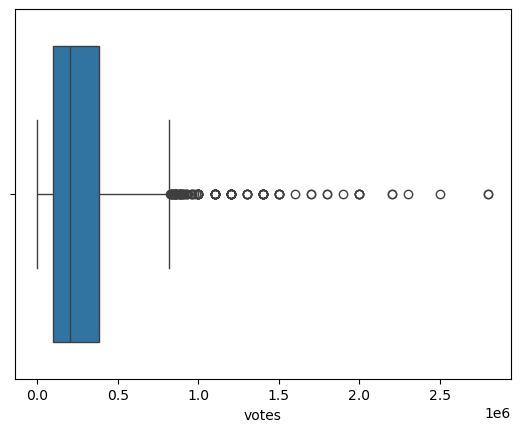

In [12]:
# Create boxplot to visual distribution of votes
sns.boxplot(x=df['votes'])

<Axes: xlabel='votes', ylabel='Count'>

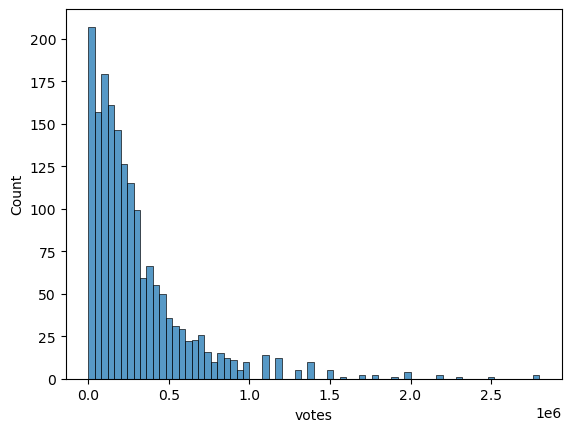

In [13]:
# Create a histogram to better visualize the distribution of votes
sns.histplot(df['votes'], bins=70)

In [14]:
#Check to see if there are any 0 in our
zero_count = (df['votes']==0).sum()
zero_count

0

In [15]:
# Perform log transform on votes
df['log_votes'] = np.log(df['votes'])
df['log_votes']

0       11.407565
1        9.680344
2       12.542545
3        9.952278
4        8.748305
          ...    
1729    12.700769
1730     9.998798
1731    12.055250
1732    12.196022
1733    11.170435
Name: log_votes, Length: 1728, dtype: float64

<Axes: xlabel='log_votes', ylabel='Count'>

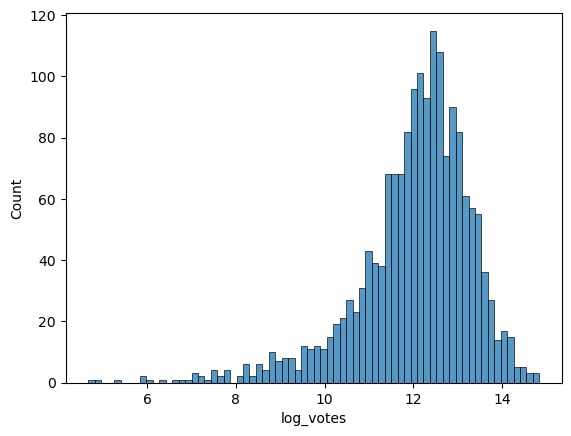

In [16]:
# Create histogram to see distribution of log transformed votes
sns.histplot(df['log_votes'], bins=70)

In [17]:
# Drop Votes column
df = df.drop(columns='votes')

In [18]:
# Convert Year to Movie Age
df['movie_age'] = 2025 - df['year']

In [19]:
# Drop year column
df = df.drop(columns=['year'])
df.head()

,row_id,movie_name,rating,meta_score,genre0,genre1,genre2,genre3,pr_rating,duration,...,cast3,cast4,director,number_rating,netflix_top_10,weekly_hours_viewed,weekly_views,all_genres,log_votes,movie_age
0,0,Leave the World Behind,6.5,67,"Drama, Mystery, Thriller",Drama,Mystery,Thriller,R,2.300,...,Ethan Hawke,Myha'la,Sam Esmail,4,1,98700000.0,41700000.0,"[Drama, Mystery, Thriller]",11.407565,2
1,16,Family Switch,5.6,37,"Comedy, Family",Comedy,Family,NaN,PG,1.767,...,Emma Myers,Brady Noon,McG,2,1,39200000.0,22200000.0,"[Comedy, Family]",9.680344,2
2,19,How the Grinch Stole Christmas,6.3,46,"Comedy, Family, Fantasy",Comedy,Family,Fantasy,PG,1.733,...,Kelley,Jeffrey Tambor,Ron Howard,2,1,7530000.0,NaN,"[Comedy, Family, Fantasy]",12.542545,25
3,23,Leo,7.0,65,"Animation, Comedy, Family",Animation,Comedy,Family,PG,1.700,...,Cecily Strong,Jason Alexander,Robert MarianettiRobert SmigelDavid Wachtenheim,2,1,61700000.0,34600000.0,"[Animation, Comedy, Family]",9.952278,2
4,27,Chicken Run: Dawn of the Nugget,6.5,63,"Animation, Adventure, Comedy",Animation,Adventure,Comedy,PG,1.683,...,Bella Ramsey,Imelda Staunton,Sam Fell,2,1,20300000.0,11900000.0,"[Animation, Adventure, Comedy]",8.748305,2


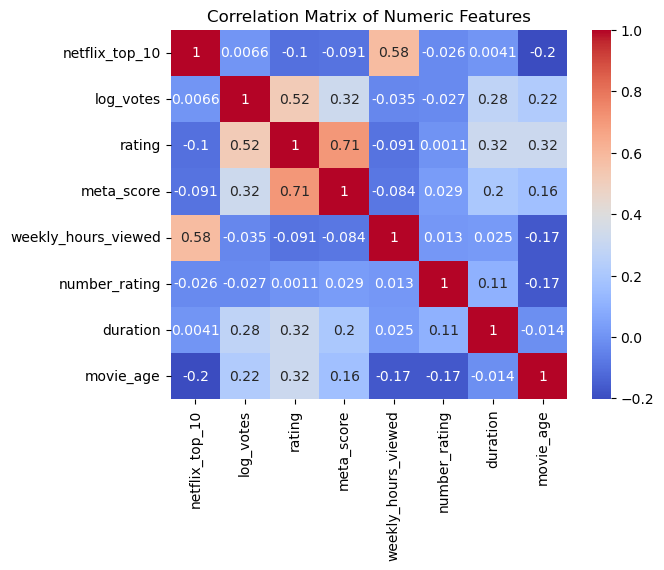

In [20]:
# Select only numeric features including the target
numeric_features = ['netflix_top_10', 'log_votes', 'rating', 'meta_score', 'weekly_hours_viewed', 'number_rating', 'duration', 'movie_age']

# Compute correlation matrix
correlation_matrix = df[numeric_features].corr()

# Visualize
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numeric Features')
plt.show()

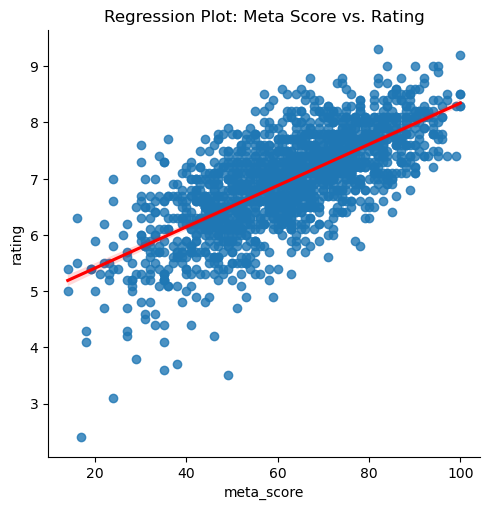

The Pearson Correlation Coefficient: 0.7058305816640229


In [21]:
# Create scatter plot and trend line
sns.lmplot(x='meta_score', y='rating', data=df, line_kws={'color': 'red'})
plt.title('Regression Plot: Meta Score vs. Rating')
plt.show()

# Use .corr() to calculate the Pearson Correlation Coeficient bewteen those two columns
print(f"The Pearson Correlation Coefficient: {df['meta_score'].corr(df['rating'])}")

In [22]:
# Check out may movies are in the Top 10 versus not (0=No, 1=Yes)
df['netflix_top_10'].value_counts()

netflix_top_10
0    1553
1     175
Name: count, dtype: int64

In [23]:
# Need to handle the list we created for `all_genres`
from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer()
genre_dummies = pd.DataFrame(
    mlb.fit_transform(df['all_genres']),
    columns=[f"genre_{g}" for g in mlb.classes_],
    index=df.index
)

In [24]:
genre_dummies.head()

,genre_Action,genre_Adventure,genre_Animation,genre_Biography,genre_Comedy,genre_Crime,genre_Documentary,genre_Drama,genre_Family,genre_Fantasy,...,genre_Horror,genre_Music,genre_Musical,genre_Mystery,genre_Romance,genre_Sci-Fi,genre_Sport,genre_Thriller,genre_War,genre_Western
0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,1,0,0
1,0,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
# Create variable for the rest of the categorical columns
categorical_cols = df[['cast1', 'cast2', 'cast3', 'cast4', 'director']]

# Convert categorical data to numeric with `pd.get_dummies`
categorical_dummies = pd.get_dummies(categorical_cols)

In [26]:
categorical_dummies.head()

,cast1_Aaron Taylor-Johnson,cast1_Abby Ryder Fortson,cast1_Abigail Cowen,cast1_Adam Devine,cast1_Adam Driver,cast1_Adam Sandler,cast1_Adam Scott,cast1_Adrien Brody,cast1_Aileen Quinn,cast1_Al Pacino,...,director_Wim Wenders,director_Wolfgang Petersen,director_Woody Allen,director_Yarrow CheneyScott Mosier,director_Yimou Zhang,director_Yorgos Lanthimos,director_Zach Braff,director_Zach Cregger,director_Zachary Wigon,director_Zack Snyder
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [27]:
# Create numeric df
numeric_columns = df[['rating', 'meta_score', 'number_rating', 'weekly_hours_viewed','log_votes', 'movie_age']]

In [28]:
numeric_columns.head()

,rating,meta_score,number_rating,weekly_hours_viewed,log_votes,movie_age
0,6.5,67,4,98700000.0,11.407565,2
1,5.6,37,2,39200000.0,9.680344,2
2,6.3,46,2,7530000.0,12.542545,25
3,7.0,65,2,61700000.0,9.952278,2
4,6.5,63,2,20300000.0,8.748305,2


In [29]:
# Split our preprocessed data into our features and target arrays
X = pd.concat([numeric_columns, genre_dummies, categorical_dummies], axis=1)
y = df['netflix_top_10']

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [30]:
X.head()

,rating,meta_score,number_rating,weekly_hours_viewed,log_votes,movie_age,genre_Action,genre_Adventure,genre_Animation,genre_Biography,...,director_Wim Wenders,director_Wolfgang Petersen,director_Woody Allen,director_Yarrow CheneyScott Mosier,director_Yimou Zhang,director_Yorgos Lanthimos,director_Zach Braff,director_Zach Cregger,director_Zachary Wigon,director_Zack Snyder
0,6.5,67,4,98700000.0,11.407565,2,0,0,0,0,...,False,False,False,False,False,False,False,False,False,False
1,5.6,37,2,39200000.0,9.680344,2,0,0,0,0,...,False,False,False,False,False,False,False,False,False,False
2,6.3,46,2,7530000.0,12.542545,25,0,0,0,0,...,False,False,False,False,False,False,False,False,False,False
3,7.0,65,2,61700000.0,9.952278,2,0,0,1,0,...,False,False,False,False,False,False,False,False,False,False
4,6.5,63,2,20300000.0,8.748305,2,0,1,1,0,...,False,False,False,False,False,False,False,False,False,False


In [31]:
# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Logistical Model

In [32]:
# Create and train the model
model = LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)
model.fit(X_train_scaled, y_train)

# Make predictions
lr_predictions = model.predict(X_test_scaled)

In [33]:
# Evaluate the model
print("Accuracy:", accuracy_score(y_test, lr_predictions))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, lr_predictions))
print("\nClassification Report:\n", classification_report(y_test, lr_predictions, target_names=['No', 'Yes']))

# Save Logistical Regression Model
joblib.dump(model, 'logistic_regression_model.pkl')

Accuracy: 0.9143518518518519

Confusion Matrix:
 [[388   8]
 [ 29   7]]

Classification Report:
               precision    recall  f1-score   support

          No       0.93      0.98      0.95       396
         Yes       0.47      0.19      0.27        36

    accuracy                           0.91       432
   macro avg       0.70      0.59      0.61       432
weighted avg       0.89      0.91      0.90       432



['logistic_regression_model.pkl']

In [34]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train_scaled, y_train)

ModuleNotFoundError: No module named 'imblearn'

In [ ]:
# Create and train the model
model = LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)
model.fit(X_resampled, y_resampled)

# Make predictions
lr_predictions = model.predict(X_test_scaled)

In [ ]:
# Evaluate the model
print("Accuracy:", accuracy_score(y_test, lr_predictions))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, lr_predictions))
print("\nClassification Report:\n", classification_report(y_test, lr_predictions, target_names=['No', 'Yes']))

### Random Forest Model

In [35]:
from sklearn.ensemble import RandomForestClassifier

# Create and train the model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
rf_predictions = rf_model.predict(X_test)

In [36]:
joblib.dump(mlb, 'mlb.pkl')
joblib.dump(model, 'rf_model.pkl')
joblib.dump(X.columns.tolist(), 'feature_columns.pkl')

['feature_columns.pkl']

In [37]:
# Evaluate the model
print("Accuracy:", accuracy_score(y_test, rf_predictions))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, rf_predictions))
print("\nClassification Report:\n", classification_report(y_test, rf_predictions, target_names=['No', 'Yes']))

# Save the Random Forest Model
joblib.dump(rf_model, 'random_forest_model.pkl')

Accuracy: 0.9953703703703703

Confusion Matrix:
 [[396   0]
 [  2  34]]

Classification Report:
               precision    recall  f1-score   support

          No       0.99      1.00      1.00       396
         Yes       1.00      0.94      0.97        36

    accuracy                           1.00       432
   macro avg       1.00      0.97      0.98       432
weighted avg       1.00      1.00      1.00       432



['random_forest_model.pkl']

In [38]:
# Check random forest model for overfitting!

# Predict on training data
y_train_pred = rf_model.predict(X_train)
train_acc = accuracy_score(y_train, y_train_pred)
print("Training Classification Report:")
print(classification_report(y_train, y_train_pred, target_names=['No', 'Yes']))

# Predict on test data
y_test_pred = rf_model.predict(X_test)
test_acc = accuracy_score(y_test, y_test_pred)

print("Test Classification Report:")
print(classification_report(y_test, y_test_pred, target_names=['No', 'Yes']))

Training Classification Report:
              precision    recall  f1-score   support

          No       1.00      1.00      1.00      1157
         Yes       1.00      1.00      1.00       139

    accuracy                           1.00      1296
   macro avg       1.00      1.00      1.00      1296
weighted avg       1.00      1.00      1.00      1296

Test Classification Report:
              precision    recall  f1-score   support

          No       0.99      1.00      1.00       396
         Yes       1.00      0.94      0.97        36

    accuracy                           1.00       432
   macro avg       1.00      0.97      0.98       432
weighted avg       1.00      1.00      1.00       432



### Keras Nueral Network Model

In [39]:
# Create the Keras Model

# This counts how many features (columns) your data has, so the model knows what kind of input to expect.
number_input_features = len(X_train_scaled[0])

# Used the standard 2 layers and standard neurons(64 and 32) to run a quick test
hidden_nodes_layer1 = 64
hidden_nodes_layer2 = 32

# Start building the Sequential model
nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim= number_input_features, activation="relu"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units= hidden_nodes_layer2, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))


# Check the structure of the model
nn.summary()

# Compile the model
nn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

/opt/anaconda3/envs/PythonData_2024_12/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │       348,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 350,465 (1.34 MB)

 Trainable params: 350,465 (1.34 MB)

 Non-trainable params: 0 (0.00 B)

In [40]:
# Train the model
# validation_split=0.2 reserves 20% of training data for validation, helping us monitor overfitting and track performance on unseen data.
# batch_size=32 trains the model in small groups, balancing speed, memory use, and generalization.
fit_model_history = nn.fit(X_train_scaled, y_train, validation_split=0.2, epochs=50, batch_size=32)

Epoch 1/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8865 - loss: 0.4093 - val_accuracy: 0.9269 - val_loss: 0.3045
Epoch 2/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8882 - loss: 0.2423 - val_accuracy: 0.9269 - val_loss: 0.2992
Epoch 3/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9684 - loss: 0.0932 - val_accuracy: 0.9115 - val_loss: 0.3432
Epoch 4/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9943 - loss: 0.0397 - val_accuracy: 0.8962 - val_loss: 0.3671
Epoch 5/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9991 - loss: 0.0165 - val_accuracy: 0.8731 - val_loss: 0.3859
Epoch 6/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9995 - loss: 0.0090 - val_accuracy: 0.8500 - val_loss: 0.4039
Epoch 7/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9971 - loss: 0.0058 - val_accuracy: 0.8462 - val_loss: 0.4141
Epoch 8/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9989 - loss: 0.0068 - val_accuracy: 0.8308 - val_loss:

In [41]:
# Evaluate the model on test data
loss, accuracy = nn.evaluate(X_test_scaled, y_test)
print(f"Test Accuracy: {accuracy:.2f}, Loss: {loss:.2f}")

# Get predicted probabilities
y_pred_probs = nn.predict(X_test_scaled)

# Convert probabilities to binary class predictions (0 or 1)
y_pred_classes = (y_pred_probs > 0.1).astype("int").flatten()

# Print confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_classes))

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_classes, target_names=["No", "Yes"]))

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9187 - loss: 0.4503 
Test Accuracy: 0.90, Loss: 0.53
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Confusion Matrix:
[[364  32]
 [ 28   8]]

Classification Report:
              precision    recall  f1-score   support

          No       0.93      0.92      0.92       396
         Yes       0.20      0.22      0.21        36

    accuracy                           0.86       432
   macro avg       0.56      0.57      0.57       432
weighted avg       0.87      0.86      0.86       432



In [42]:
#Save file
nn.save('keras_model.keras')

### Keras Tuner

In [43]:
# This counts how many features (columns) your data has, so the model knows what kind of input to expect.
number_input_features = len(X_train_scaled[0])

# Create a method that creates a new Sequential model with hyperparameter options
def create_model(hp):
    nn = tf.keras.models.Sequential()

    # Allow kerastuner to decide which activation function to use in hidden layers
    activation = hp.Choice('activation',['relu','selu'])

    # Allow kerastuner to decide number of neurons in first layer
    nn.add(tf.keras.layers.Dense(units=hp.Int('first_units',
        min_value=8,
        max_value=128,
        step=8), activation=activation, input_dim=number_input_features))

    # Allow kerastuner to decide number of hidden layers and neurons in hidden layers
    for i in range(hp.Int('num_layers', 1, 4)):
        nn.add(tf.keras.layers.Dense(units=hp.Int('units_' + str(i),
            min_value=8,
            max_value=64,
            step=8),
            activation=activation))
        nn.add(tf.keras.layers.BatchNormalization()) # added after inital testing and the accuracy went down


    # Output layer for binary classification
    nn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

    # Compile the model
    nn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [44]:
!pip install keras-tuner

In [45]:
import keras_tuner as kt

tuner = kt.Hyperband(
    create_model,
    objective="val_accuracy",
    max_epochs=20,
    hyperband_iterations=2)

/opt/anaconda3/envs/PythonData_2024_12/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [46]:
# Run the Keras Tuner search for best hyperparameters
tuner.search(X_train_scaled, y_train,
             epochs=20,
             validation_split=0.2,
             batch_size=32)


Search: Running Trial #1

Value             |Best Value So Far |Hyperparameter
selu              |selu              |activation
24                |24                |first_units
4                 |4                 |num_layers
24                |24                |units_0
3                 |3                 |tuner/epochs
0                 |0                 |tuner/initial_epoch
2                 |2                 |tuner/bracket
0                 |0                 |tuner/round



FatalTypeError: Expected the model-building function, or HyperModel.build() to return a valid Keras Model instance. Received: None of type <class 'NoneType'>.

In [47]:
# Get best model hyperparameters
best_hyper = tuner.get_best_hyperparameters(1)[0]
best_hyper.values

{'activation': 'selu',
 'first_units': 24,
 'num_layers': 4,
 'units_0': 24,
 'tuner/epochs': 3,
 'tuner/initial_epoch': 0,
 'tuner/bracket': 2,
 'tuner/round': 0,
 'units_1': 8,
 'units_2': 8,
 'units_3': 8}

In [48]:
# Evaluate best model from tuner
best_model = tuner.get_best_models(1)[0]

# Evaluate it on the test set
loss, accuracy = best_model.evaluate(X_test_scaled, y_test)
print(f"Best Tuned Model: Test Accuracy: {accuracy:.2f}")

FatalTypeError: Expected the model-building function, or HyperModel.build() to return a valid Keras Model instance. Received: None of type <class 'NoneType'>.

### Optimized Keras Model

In [ ]:
# Create the Keras Model

# This counts how many features (columns) your data has, so the model knows what kind of input to expect.
number_input_features = len(X_train_scaled[0])

# Layers
hidden_nodes_layer1 = 16
hidden_nodes_layer2 = 24
hidden_nodes_layer3 = 16

# Start building the Sequential model
nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim= number_input_features, activation="relu"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units= hidden_nodes_layer2, activation="relu"))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units= hidden_nodes_layer2, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# Check the structure of the model
nn.summary()

# Compile the model
nn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
# validation_split=0.2 reserves 20% of training data for validation, helping us monitor overfitting and track performance on unseen data.
# batch_size=32 trains the model in small groups, balancing speed, memory use, and generalization.
fit_model_history = nn.fit(X_train_scaled, y_train, validation_split=0.2, epochs=50, batch_size=32)

In [ ]:
# Evaluate the model on test data
loss, accuracy = nn.evaluate(X_test_scaled, y_test)
print(f"Test Accuracy: {accuracy:.2f}, Loss: {loss:.2f}")

# Get predicted probabilities
y_pred_probs = nn.predict(X_test_scaled)

# Convert probabilities to binary class predictions (0 or 1)
y_pred_classes = (y_pred_probs > 0.1).astype("int").flatten()

# Print confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_classes))

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_classes, target_names=["No", "Yes"]))

### Tested LeakyReLU

In [ ]:
# Count number of input features
number_input_features = len(X_train_scaled[0])

# Define hidden layer sizes
hidden_nodes_layer1 = 16
hidden_nodes_layer2 = 24
hidden_nodes_layer3 = 16

# Build the model
nn = tf.keras.models.Sequential()

# Input layer + Leaky ReLU
nn.add(Dense(units=hidden_nodes_layer1, input_dim=number_input_features))
nn.add(LeakyReLU(alpha=0.1))

# Hidden layers + Leaky ReLU
nn.add(Dense(units=hidden_nodes_layer2))
nn.add(LeakyReLU(alpha=0.1))

nn.add(Dense(units=hidden_nodes_layer3))
nn.add(LeakyReLU(alpha=0.1))

nn.add(LeakyReLU(alpha=0.1))

# Output layer
nn.add(Dense(units=1, activation="sigmoid"))

# Print summary
nn.summary()

# Compile model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train the model
# validation_split=0.2 reserves 20% of training data for validation, helping us monitor overfitting and track performance on unseen data.
# batch_size=32 trains the model in small groups, balancing speed, memory use, and generalization.
fit_model_history = nn.fit(X_train_scaled, y_train, epochs=20, batch_size=32)

In [ ]:
# Evaluate the model on test data
loss, accuracy = nn.evaluate(X_test_scaled, y_test)
print(f"Test Accuracy: {accuracy:.2f}, Loss: {loss:.2f}")

# Get predicted probabilities
y_pred_probs = nn.predict(X_test_scaled)

# Convert probabilities to binary class predictions (0 or 1)
y_pred_classes = (y_pred_probs > 0.1).astype("int").flatten()

# Print confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_classes))

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_classes, target_names=["No", "Yes"]))